## **Applying K-Medoids Clustering**

## Step 1: Import the Required Libraries and Load the Dataset

- Import **pandas, NumPy, matplotlib, and KMeans** from sklearn
- Load the Mall_customers.csv dataset


## You may need to install scikit-learn-extra since it has been installed so now commented out.
## pip install scikit-learn-extra    

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn_extra.cluster import KMedoids

In [8]:
## Same dataset which is used in K-Means.
df = pd.read_csv('../../Datasets/Mall_customers.csv')

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


__Observation:__
- Here, we have the **Age, Gender, Income, and Spending Score** of the customers.

## Step 2: Prepare the Data

- Extract the relevant features from the dataset


In [10]:
X = df.iloc[:, [3, 4]].values

## Elbow method 

- The elbow method involves plotting the number of clusters against the distortion or inertia to identify a significant flattening point known as the __elbow__ point.
- The elbow point represents a trade-off between capturing meaningful patterns and avoiding excessive complexity, and it indicates the optimal number of clusters.
- By choosing the value of k at the elbow point, we strike a balance between cluster quality and simplicity, resulting in a reasonable number of clusters.

## Step 3: Find the Optimal Number of Clusters Using the Elbow Method

- Calculate the WCSS (within-cluster sum of squares) for different numbers of clusters.
- Plot the WCSS values to find the optimal number of clusters.


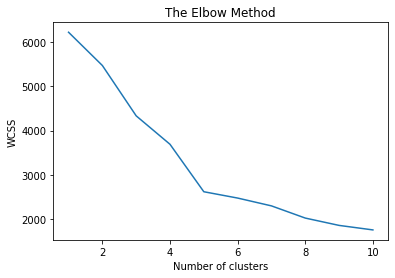

In [12]:
wcss = []
for i in range(1, 11):
    model = KMedoids(n_clusters = i, init = 'k-medoids++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Step 4: Train the K-Medoids Model on the Dataset

- Train the K-Medoids model with the optimal number of clusters


In [13]:
model = KMedoids(n_clusters = 5, init = 'k-medoids++', random_state = 42)
y_kmedoids = model.fit_predict(X)

## Step 5: Visualize the Clusters

- Plot the clusters and their centroids on a scatter plot
- Assign the color for each point
- Consider the title, xlabel, and ylabel

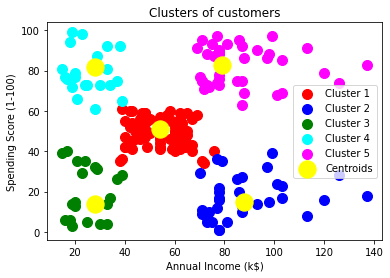

In [14]:
plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmedoids == 2, 0], X[y_kmedoids == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmedoids == 3, 0], X[y_kmedoids == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmedoids == 4, 0], X[y_kmedoids == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

__Observation:__
- K_medoids clusters with K = 5.